In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load preprocessed dataset
df = pd.read_csv("C:/Users/BALA/OneDrive - University of Hertfordshire/Desktop/mutual-fund-recommender/data/processed/preprocessed_mutual_funds.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Pick one Scheme_Code to forecast
scheme_code = df['Scheme_Code'].value_counts().idxmax()
print("Selected Scheme:", scheme_code)

scheme_df = df[df['Scheme_Code'] == scheme_code].sort_values("Date")
scheme_df.reset_index(drop=True, inplace=True)


Selected Scheme: 101206


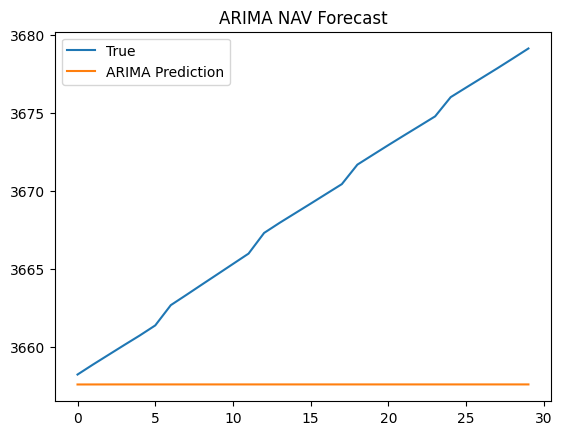

In [8]:
sys.path.append('./src')
from arima_model import run_arima_forecast

arima_preds, arima_true = run_arima_forecast(scheme_df)
plt.plot(arima_true, label='True')
plt.plot(arima_preds, label='ARIMA Prediction')
plt.title("ARIMA NAV Forecast")
plt.legend()
plt.show()


C:\Users\BALA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


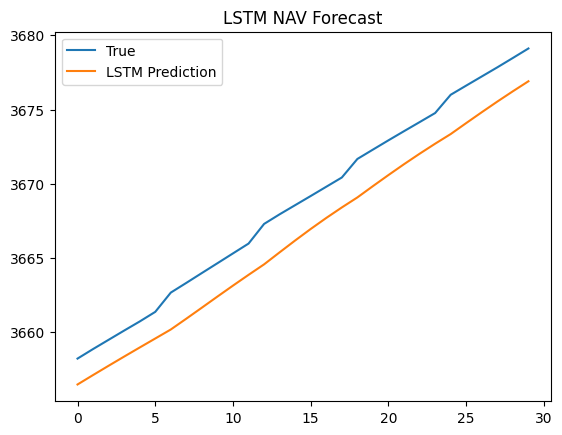

In [9]:
sys.path.append('./src')
from lstm_model import run_lstm_forecast

lstm_preds, lstm_true = run_lstm_forecast(scheme_df)
plt.plot(lstm_true, label='True')
plt.plot(lstm_preds, label='LSTM Prediction')
plt.title("LSTM NAV Forecast")
plt.legend()
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}")
    return {"Model": model_name, "RMSE": rmse, "MAE": mae}

# Evaluate both
arima_metrics = evaluate_model(arima_true, arima_preds, "ARIMA")
lstm_metrics = evaluate_model(lstm_true, lstm_preds, "LSTM")


ARIMA - RMSE: 12.8516, MAE: 11.1612
LSTM - RMSE: 2.2331, MAE: 2.2149


In [11]:
preds_df = pd.DataFrame({
    "Date": scheme_df['Date'].iloc[-30:].values,
    "Actual_NAV": lstm_true,
    "LSTM_Predicted_NAV": lstm_preds,
    "ARIMA_Predicted_NAV": arima_preds
})

preds_df.to_csv("C:/Users/BALA/OneDrive - University of Hertfordshire/Desktop/mutual-fund-recommender/data/processed/nav_predictions.csv", index=False)
print("Predictions exported to data/processed/nav_predictions.csv")


Predictions exported to data/processed/nav_predictions.csv


In [12]:
import pandas as pd

results_df = pd.DataFrame([arima_metrics, lstm_metrics])
results_df = results_df.sort_values(by="RMSE")

print("Model Performance Leaderboard:")
results_df.reset_index(drop=True, inplace=True)
results_df


Model Performance Leaderboard:


,Model,RMSE,MAE
0,LSTM,2.233137,2.214904
1,ARIMA,12.851641,11.161170
